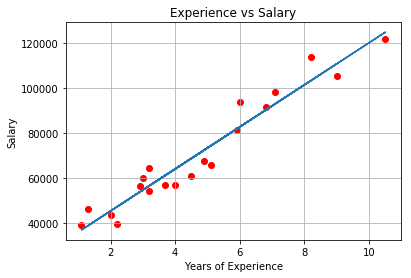

In [25]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

# Importing the dataset from the url
url = 'https://raw.githubusercontent.com/uzay00/KaVe/master/Ders2/data/Salary_Data.csv'
data = pd.read_csv(url)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split dataset into train ab=nd test sets
X_train, X_test, y_train, t_test = train_test_split(X,y,test_size = 1/3, random_state = 0)

# fit simple linear regression model to the data
lr = LinearRegression()
lr.fit(X_train, y_train)
# make predicitions
y_pred = lr.predict(X_test)

# Plot
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lr.predict(X_train))
plt.title('Experience vs Salary'); plt.xlabel('Years of Experience');plt.ylabel('Salary');
#plt.xlabel('Population of City in 10,000s');plt.ylabel('Profit in $10,000s');
plt.grid()

In [2]:
data.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

In [3]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

## Gradient Descent

$$
J(w) = (w-3)^2 + 5
$$

In [4]:
def cost(w):
    return ((w-3)**2)+5

def derivative(w):
    return 2*(w-3)

def gradient_descent(w = 0, alpha = 0.05, number_steps = 10):
    """
    w : initial value of parameter w
    alpha : step size
    """
    W = np.zeros(number_steps)
    for i in range(number_steps):
        W[i] = w
        w = w - alpha * derivative(w)

    return W

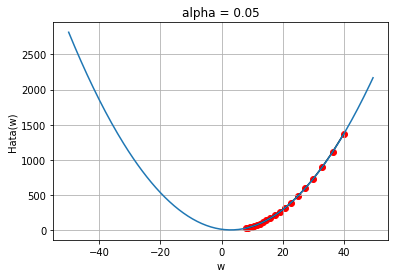

In [5]:
a = 0.05
W = gradient_descent(w = 40, alpha = a, number_steps = 20)
t = np.arange(-50,50,0.5)

plt.plot(W,cost(W),'k')
plt.scatter(W,cost(W), color = 'red')
plt.plot(t,cost(t))
plt.xlabel('w'); plt.ylabel('Hata(w)'); plt.title("alpha = " + str(a))
plt.grid()

# Use Gradient Descent for Salary Data

Parameters
$$
W = 
\begin{bmatrix} 
w_0 \\
w_1
\end{bmatrix}
$$
Hypothesis
$$
h = 
XW =
\begin{bmatrix} 
x_{00} & x_{01} \\
x_{10} & x_{11} \\
x_{20} & x_{21} \\
x_{30} & x_{31}
\end{bmatrix}
\begin{bmatrix} 
w_0 \\
w_1 
\end{bmatrix}
=
\begin{bmatrix} 
1 & x_{01} \\
1 & x_{11} \\
1 & x_{21} \\
1 & x_{31}
\end{bmatrix}
\begin{bmatrix} 
w_0 \\
w_1 
\end{bmatrix}
=
\begin{bmatrix} 
w_0 + w_1 x_{01} \\
w_0 + w_1 x_{11} \\
w_0 + w_1 x_{21} \\
w_0 + w_1 x_{31}
\end{bmatrix}
=
\begin{bmatrix} 
h_{0} \\
h_{1} \\
h_{2} \\
h_{3}
\end{bmatrix}
$$


Cost Function
$$
J(W) = \frac{1}{2m} \sum_{i=1}^{m} (y_i - h_i)^2
$$

Derivative of Cost Funnction
$$
\frac{dJ(W)}{dw} = \frac{1}{m} \sum_{i=1}^{m} (y_i - h_i)x_i
$$

![](data/kisa.png)

In [6]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

# Importing the dataset from the url
url = 'https://raw.githubusercontent.com/uzay00/KaVe/master/Ders2/data/Salary_Data.csv'
data = pd.read_csv(url)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split dataset into train ab=nd test sets
X_train, X_test, y_train, t_test = train_test_split(X,y,test_size = 1/3, random_state = 0)

In [7]:
X_train.shape

(20, 1)

In [8]:
X_train = np.hstack((np.ones((len(X_train),1)), X_train))
X_train

array([[ 1. ,  2.9],
       [ 1. ,  5.1],
       [ 1. ,  3.2],
       [ 1. ,  4.5],
       [ 1. ,  8.2],
       [ 1. ,  6.8],
       [ 1. ,  1.3],
       [ 1. , 10.5],
       [ 1. ,  3. ],
       [ 1. ,  2.2],
       [ 1. ,  5.9],
       [ 1. ,  6. ],
       [ 1. ,  3.7],
       [ 1. ,  3.2],
       [ 1. ,  9. ],
       [ 1. ,  2. ],
       [ 1. ,  1.1],
       [ 1. ,  7.1],
       [ 1. ,  4.9],
       [ 1. ,  4. ]])

In [9]:
X_train.shape[1]

2

In [10]:
W = np.array([[1],[1]])
W

array([[1],
       [1]])

In [11]:
h = X_train.dot(W)
h

array([[ 3.9],
       [ 6.1],
       [ 4.2],
       [ 5.5],
       [ 9.2],
       [ 7.8],
       [ 2.3],
       [11.5],
       [ 4. ],
       [ 3.2],
       [ 6.9],
       [ 7. ],
       [ 4.7],
       [ 4.2],
       [10. ],
       [ 3. ],
       [ 2.1],
       [ 8.1],
       [ 5.9],
       [ 5. ]])

In [12]:
# Shape of y can be problematic
y_train.shape

(20,)

In [13]:
h.shape

(20, 1)

In [14]:
# Reshape it with correct dimensions
y_train = y_train.reshape(h.shape)
y_train

array([[ 56642.],
       [ 66029.],
       [ 64445.],
       [ 61111.],
       [113812.],
       [ 91738.],
       [ 46205.],
       [121872.],
       [ 60150.],
       [ 39891.],
       [ 81363.],
       [ 93940.],
       [ 57189.],
       [ 54445.],
       [105582.],
       [ 43525.],
       [ 39343.],
       [ 98273.],
       [ 67938.],
       [ 56957.]])

In [15]:
np.random.randn(2,1)

array([[-0.57869029],
       [ 0.69316084]])

# Use Gradient Descent for Salary Data

Parameters
$$
W = 
\begin{bmatrix} 
w_0 \\
w_1 \\
w_2 
\end{bmatrix}
$$
Hypothesis
$$
h = 
XW =
\begin{bmatrix} 
x_{00} & x_{01} & x_{02}\\
x_{10} & x_{11} & x_{12}\\
x_{20} & x_{21} & x_{22}\\
x_{30} & x_{31} & x_{32}\\
x_{40} & x_{41} & x_{42}
\end{bmatrix}
\begin{bmatrix} 
w_0 \\
w_1 \\
w_2 
\end{bmatrix}
=
\begin{bmatrix} 
1 & x_{01} & x_{02}\\
1 & x_{11} & x_{12}\\
1 & x_{21} & x_{22}\\
1 & x_{31} & x_{32}\\
1 & x_{41} & x_{42}
\end{bmatrix}
\begin{bmatrix} 
w_0 \\
w_1 \\
w_2 
\end{bmatrix}
=
\begin{bmatrix} 
w_0 + w_1 x_{01} + w_2 x_{02}\\
w_0 + w_1 x_{11} + w_2 x_{12}\\
w_0 + w_1 x_{21} + w_2 x_{22}\\
w_0 + w_1 x_{31} + w_2 x_{32}\\
w_0 + w_1 x_{41} + w_2 x_{42}\\
\end{bmatrix}
=
\begin{bmatrix} 
h_{0} \\
h_{1} \\
h_{2} \\
h_{3} \\
h_{4}
\end{bmatrix}
$$


Cost Function
$$
J(W) = \frac{1}{2m} \sum_{i=1}^{m} (h_i - y_i)^2
= \frac{1}{2m} \sum_{i=1}^{m} ((w_0 + w_1 x_{i1} + w_2 x_{i2}) - y_i)^2
$$

Derivative of Cost Funnction
$$
\frac{dJ(W)}{dw_j} = 
\sum_{i=1}^{m}
\frac{dJ(W)}{dh_i} \frac{dh_i}{dw_j} 
=  
\sum_{i=1}^{m}
\frac{1}{m} (h_i - y_i)
\frac{dh_i}{dw_j}
=
\frac{1}{m}
\sum_{i=1}^{m}
(h_i - y_i)
\frac{dh_i}{dw_j}
=
\frac{1}{m} \sum_{i=1}^{m} (h_i - y_i) x_{ij}
$$

Derivative of Cost Funnction
$$
\frac{dJ(W)}{dw} = 
\begin{bmatrix} 
\frac{dJ(W)}{dw_0} \\
\frac{dJ(W)}{dw_1} \\
\frac{dJ(W)}{dw_2}
\end{bmatrix}
=
\frac{1}{m}
\begin{bmatrix} 
\sum_{i=1}^{m} (h_i - y_i) x_{i0} \\
\sum_{i=1}^{m} (h_i - y_i) x_{i1} \\
\sum_{i=1}^{m} (h_i - y_i) x_{i2}
\end{bmatrix}
$$

![](data/uzun.png)

In [16]:
W = np.array([[1],[1],[1]]) 
X = np.array([[1,0,0],[1,1,1],[1,2,2],[1,3,3],[1,4,4],[1,5,5]])
y = np.array([[0],[0],[0],[0],[1],[1]]) 
h = X.dot(W)
m, n = X.shape
cost = np.sum(np.power(h-y,2))/ (2*m)
derivative = np.sum(X * (h-y), axis=0)/ m
print("W:\n", W)
print("X:\n", X)
print("y:\n", y)
print("h:\n", h)
print("cost:\n", cost)
print("derivative for every w_j:\n", derivative)
derivative.shape

W:
 [[1]
 [1]
 [1]]
X:
 [[1 0 0]
 [1 1 1]
 [1 2 2]
 [1 3 3]
 [1 4 4]
 [1 5 5]]
y:
 [[0]
 [0]
 [0]
 [0]
 [1]
 [1]]
h:
 [[ 1]
 [ 3]
 [ 5]
 [ 7]
 [ 9]
 [11]]
cost:
 20.666666666666668
derivative for every w_j:
 [ 5.66666667 19.33333333 19.33333333]


(3,)

In [17]:
(h-y)

array([[ 1],
       [ 3],
       [ 5],
       [ 7],
       [ 8],
       [10]])

In [18]:
(h-y) * X

array([[ 1,  0,  0],
       [ 3,  3,  3],
       [ 5, 10, 10],
       [ 7, 21, 21],
       [ 8, 32, 32],
       [10, 50, 50]])

In [19]:
np.sum(X * (h-y), axis=0)

array([ 34, 116, 116])

In [20]:
X[:,0] == np.ones(6)

array([ True,  True,  True,  True,  True,  True])

In [21]:
class myRegression():
    def __init__(self,X_train, y_train):
        self.m, self.n = X_train.shape
        self.n += 1 # Add one for x_0 column 
        
        self.X_train = np.hstack((np.ones((self.m,1)), X_train))
        self.y_train = y_train.reshape((self.m,1))
        self.W = np.random.randn(self.n,1)
        print(self.W)
            
    def cost(self):
        h = self.X_train.dot(self.W)
        return np.sum(np.power(h-self.y_train,2))/ (2*self.m)

    def derivative(self):
        h = self.X_train.dot(self.W)  
        derivative = np.sum(self.X_train * (h-self.y_train), axis=0)/ self.m
        return derivative.reshape(self.W.shape)

    def gradient_descent(self, alpha = 0.05, number_steps = 100):
        for i in range(number_steps):
            self.W = self.W - alpha * self.derivative()
        return self.W
    
    def predict(self, X_test):
        m, n = X_test.shape
        X_test = np.hstack((np.ones((m,1)), X_test))
        return X_test.dot(self.W)
    
    def fit(self):
        self.W = self.gradient_descent()

In [22]:
# Split dataset into train ab=nd test sets
X_train, X_test, y_train, t_test = train_test_split(X,y,test_size = 1/3, random_state = 0)

me = myRegression(X_train, y_train)
me.fit()
me.predict(X_test)

[[ 0.23051628]
 [-1.48885748]
 [ 0.83000493]
 [ 0.74039231]]


array([[0.87504335],
       [0.23601103]])

In [23]:
X_test

array([[1, 5, 5],
       [1, 2, 2]])

[[1.03453819]
 [0.51957935]]


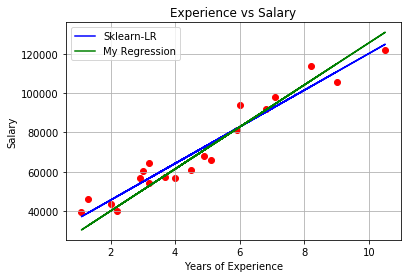

In [24]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

# Importing the dataset from the url
url = 'https://raw.githubusercontent.com/uzay00/KaVe/master/Ders2/data/Salary_Data.csv'
data = pd.read_csv(url)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split dataset into train ab=nd test sets
X_train, X_test, y_train, t_test = train_test_split(X,y,test_size = 1/3, random_state = 0)


############################################################
# fit simple linear regression model to the data
lr = LinearRegression()
lr.fit(X_train, y_train)
# make predicitions
y_pred = lr.predict(X_test)
############################################################
# fit simple linear regression model to the data
mr = myRegression(X_train, y_train)
mr.fit()
# make predicitions
y_mr_pred = mr.predict(X_test)
############################################################

# Plot
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.plot(X_train, mr.predict(X_train), color = 'green')
plt.title('Experience vs Salary'); plt.xlabel('Years of Experience');plt.ylabel('Salary');
plt.legend(("Sklearn-LR", "My Regression"))
plt.grid()